In [1]:
using Luna

In [2]:
diameter = 536e-6
a = diameter/2
gas = :Ar
p = 1.8
flength = 2

λ0 = 1030e-9
τfwhm = 292e-15
energy = 1.9e-3

λlims = (400e-9, 2e-6) # grid wavelength limits
trange = 1e-12 # time grid size

modes = 4 # number of modes

4

In [3]:
first_stage = prop_capillary(a, flength, gas, p; λ0, τfwhm, energy, λlims=λlims, trange=trange, modes)

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.15 - 0.75 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 4496.89, samples: 8192, δt = 222.38 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 1000.0 fs, actual time window: 1821.7 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 4096 / 8192, ωmax 7.06e+15 / 1.41e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 15.760834782784002 eV, 1030.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using radial modal integral.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5L

MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

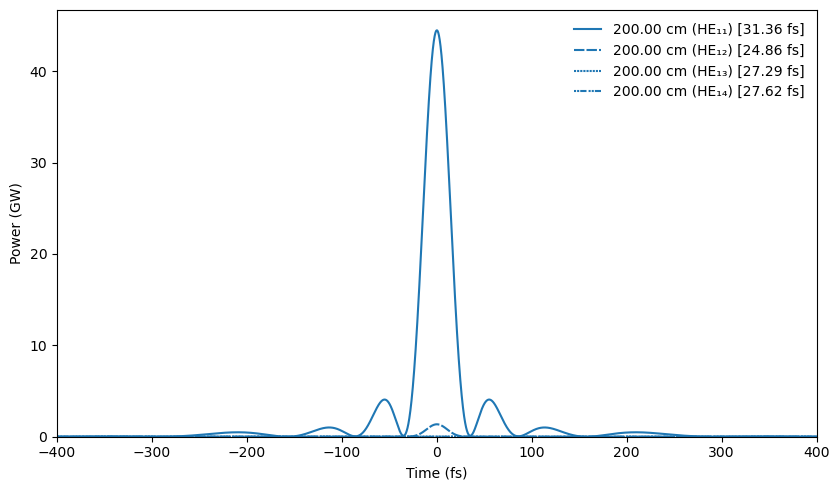

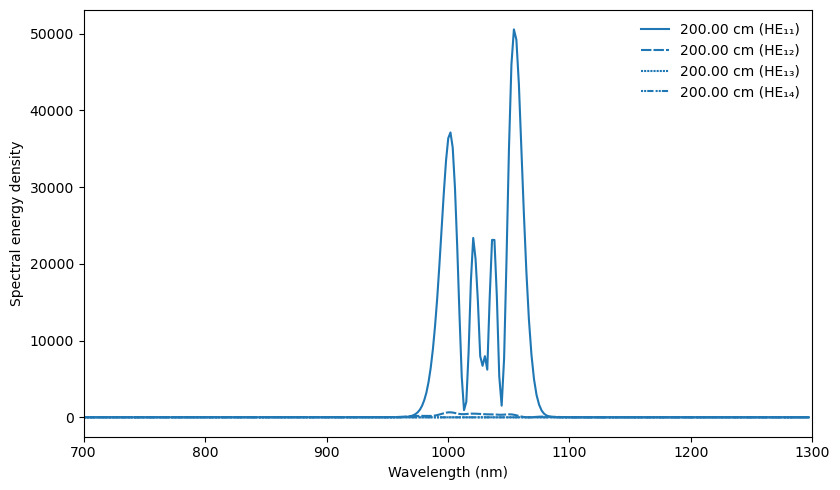

In [4]:
Plotting.time_1D(first_stage; FTL=true, trange =(-400e-15, 400e-15));
Plotting.spec_1D(first_stage; λrange=(0.7e-6, 1.3e-6), log10=false);

In [5]:
λ0=1030e-9

function prop!(Eω, grid)
    #Fields.prop_mirror!(Eω, grid, :PC70, 10) # 10 chirped mirror bounces
    #Fields.prop_material!(Eω, grid, :Air, 5, λ0) # 5 m of air path total
    #Fields.prop_material!(Eω, grid, :SiO2, 2e-3, λ0) # 2 1-mm windows
    # optimise compression with silica insertion (i.e. wedges)
    #_, Eωopt = Fields.optcomp_material(Eω, grid, :SiO2, λ0, -1e-2, 1e-2)
    _, Eωopt = Fields.optcomp_taylor(Eω, grid, λ0)
    Eω .= Eωopt
end

# non-mutating version of prop! as required for plotting
function prop(grid, Eω)
    Eωout = copy(Eω)
    prop!(Eωout, grid)
    Eωout
end

prop (generic function with 1 method)

In [6]:
energy_2s = 1.6e-3
lambda_2s = 1030e-9
second_stage = Interface.Pulses.LunaPulse(first_stage;energy=energy_2s,λ0=lambda_2s,propagator=prop!)

Luna.Interface.Pulses.DataPulse{Luna.Fields.PropagatedField{typeof(prop!), Luna.Fields.DataField}}(:lowest, :linear, Luna.Fields.PropagatedField{typeof(prop!), Luna.Fields.DataField}(prop!, Luna.Fields.DataField([0.0, 3.4490690319375977e12, 6.898138063875195e12, 1.0347207095812793e13, 1.379627612775039e13, 1.7245345159687988e13, 2.0694414191625586e13, 2.4143483223563184e13, 2.759255225550078e13, 3.104162128743838e13  …  7.032651756120762e15, 7.036100825152699e15, 7.039549894184637e15, 7.042998963216574e15, 7.046448032248512e15, 7.04989710128045e15, 7.053346170312387e15, 7.056795239344325e15, 7.060244308376262e15, 7.0636933774082e15], [6.860966872759832e-20, 1.2959604092990795e-19, 1.3552527156068805e-20, 8.585547460065513e-19, 5.124549330888517e-19, 1.6940658945086007e-20, 2.710505431213761e-19, 1.0014047018913968e-18, 3.8285889215894375e-19, 3.22931311140702e-21  …  7.776821246978545e-20, 1.6601845766184287e-19, 4.864086699607821e-19, 2.710505431213761e-19, 1.7957098481791165e-19, 5.3

In [7]:
#######################
### 0.5 meter stage ###
#######################
HCF_len_2nd = 0.5
HCF_press_2nd = 0.2

output_2ndstage_0 = prop_capillary(a, HCF_len_2nd, gas, 0.1; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_1 = prop_capillary(a, HCF_len_2nd, gas, 0.2; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_2 = prop_capillary(a, HCF_len_2nd, gas, 0.3; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_3 = prop_capillary(a, HCF_len_2nd, gas, 0.4; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_4 = prop_capillary(a, HCF_len_2nd, gas, 0.5; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.12 - 1.00 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 5995.85, samples: 8192, δt = 166.78 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 1000.0 fs, actual time window: 1366.3 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 4096 / 8192, ωmax 9.42e+15 / 1.88e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 15.760834782784002 eV, 1030.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using radial modal integral.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5L

┌ Info: FFTW wisdom saved to /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:103
┌ Info: Found FFTW wisdom at /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:86
┌ Info: FFTW wisdom saved to /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:103
┌ Info: Starting propagation
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:40
┌ Info: Progress: 18.24 %, ETA: 00:00:22, stepsize 2.54e-03, err 0.15, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progress: 28.74 %, ETA: 00:00:25, stepsize 3.13e-03, err 0.26, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progress: 57.14 %, ETA: 00:00:11, stepsize 2.22e-03, err 0.24, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progr

MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

In [17]:
##########################
### 0.5 meter Ne stage ###
##########################
HCF_len_2nd = 0.5
HCF_press_2nd = 0.2

output_2ndstage_0 = prop_capillary(a, HCF_len_2nd, :Ne, 2.9; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_1 = prop_capillary(a, HCF_len_2nd, :Ne, 3.3; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_2 = prop_capillary(a, HCF_len_2nd, :Ne, 3.7; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_3 = prop_capillary(a, HCF_len_2nd, :Ne, 4.1; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_4 = prop_capillary(a, HCF_len_2nd, :Ne, 4.5; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.12 - 1.00 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 5995.85, samples: 8192, δt = 166.78 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 1000.0 fs, actual time window: 1366.3 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 4096 / 8192, ωmax 9.42e+15 / 1.88e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 21.56502342085 eV, 1030.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using radial modal integral.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/sr

┌ Info: FFTW wisdom saved to /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:103
┌ Info: Found FFTW wisdom at /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:86
┌ Info: FFTW wisdom saved to /Users/larsenk/.luna/FFTWcache_1threads
└ @ Luna.Utils /Users/larsenk/.julia/packages/Luna/An5LJ/src/Utils.jl:103
┌ Info: Starting propagation
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:40
┌ Info: Progress: 56.78 %, ETA: 00:00:03, stepsize 4.92e-03, err 0.22, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Propagation finished in 9.082 seconds, 120 steps
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:80


MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

In [31]:
########################
### 0.25 meter stage ###
########################
HCF_len_2nd = 0.15
gas_short = :Ar #:Ne is crazy

output_2ndstage_0 = prop_capillary(a, HCF_len_2nd, gas_short, 0.6; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_1 = prop_capillary(a, HCF_len_2nd, gas_short, 0.7; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_2 = prop_capillary(a, HCF_len_2nd, gas_short, 0.8; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_3 = prop_capillary(a, HCF_len_2nd, gas_short, 0.9; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)
output_2ndstage_4 = prop_capillary(a, HCF_len_2nd, gas_short, 1.0; λ0=lambda_2s, energy=energy_2s, λlims=(300e-9, 2.5e-6), trange=1e-12, pulses = second_stage, modes=4)

┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.12 - 1.00 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 5995.85, samples: 8192, δt = 166.78 as
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:44
┌ Info: Requested time window: 1000.0 fs, actual time window: 1366.3 fs
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:46
┌ Info: Grid: samples 4096 / 8192, ωmax 9.42e+15 / 1.88e+16
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:78
┌ Info: Using PPT ionisation rate.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:534
┌ Info: Found cached PPT rate for 15.760834782784002 eV, 1030.0 nm
└ @ Luna.Ionisation /Users/larsenk/.julia/packages/Luna/An5LJ/src/Ionisation.jl:144
┌ Info: Using radial modal integral.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5L

┌ Info: Progress: 39.82 %, ETA: 00:00:07, stepsize 1.16e-03, err 0.72, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progress: 49.87 %, ETA: 00:00:10, stepsize 1.16e-03, err 0.10, repeated 0
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progress: 62.63 %, ETA: 00:00:09, stepsize 1.36e-03, err 0.70, repeated 1
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Progress: 82.95 %, ETA: 00:00:04, stepsize 1.71e-03, err 0.17, repeated 1
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:55
┌ Info: Propagation finished in 23.581 seconds, 103 steps
└ @ Luna.RK45 /Users/larsenk/.julia/packages/Luna/An5LJ/src/RK45.jl:80
┌ Info: X+Y polarisation not required.
└ @ Luna.Interface /Users/larsenk/.julia/packages/Luna/An5LJ/src/Interface.jl:353
┌ Info: Freq limits 0.12 - 1.00 PHz
└ @ Luna.Grid /Users/larsenk/.julia/packages/Luna/An5LJ/src/Grid.jl:40
┌ Info: Samples needed: 5995.85

MemoryOutput["simulation_type", "dumps", "meta", "Eω", "prop_capillary_args", "grid", "stats", "z"]

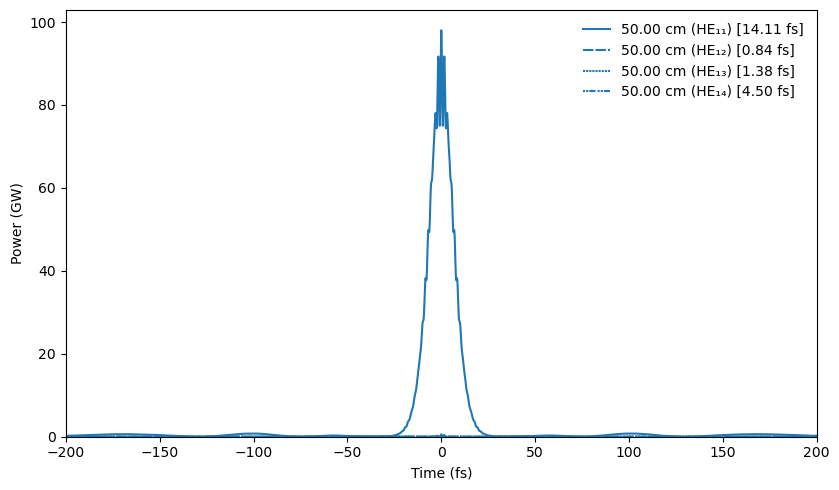

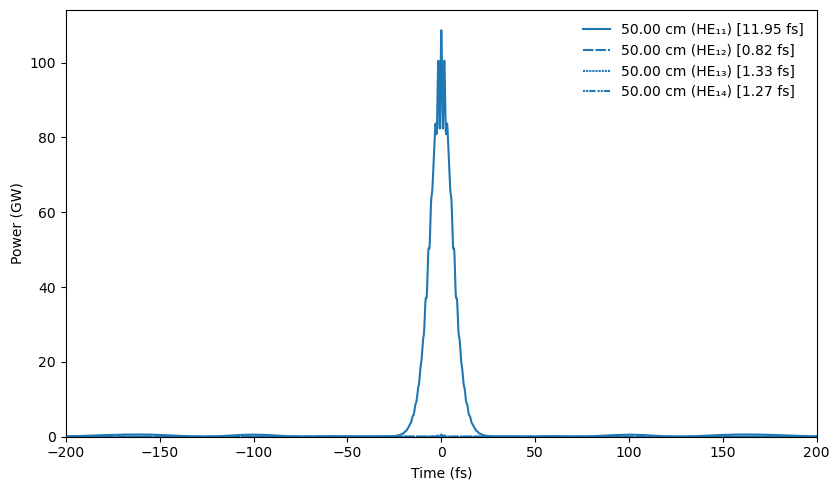

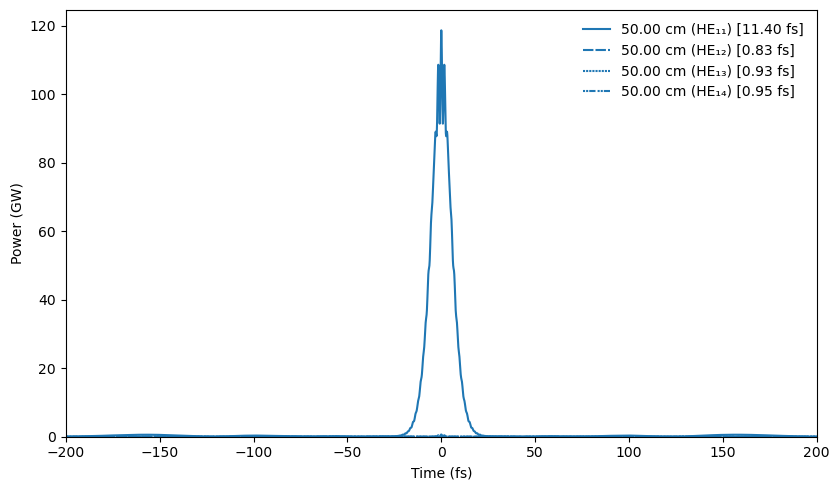

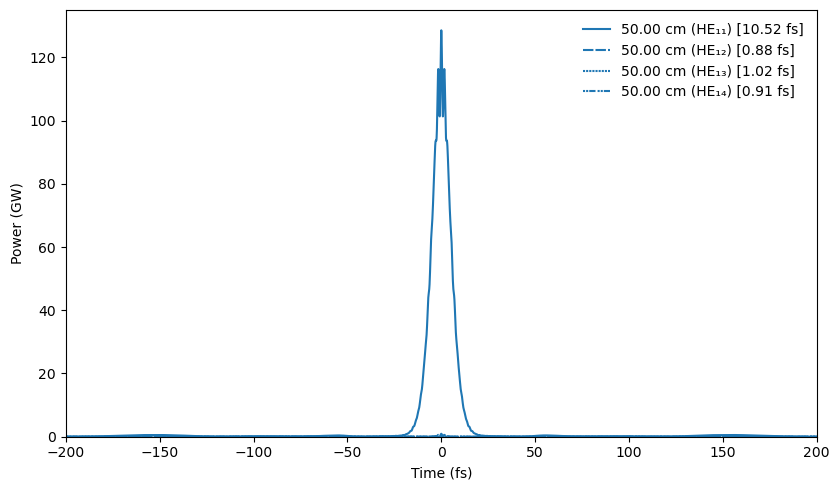

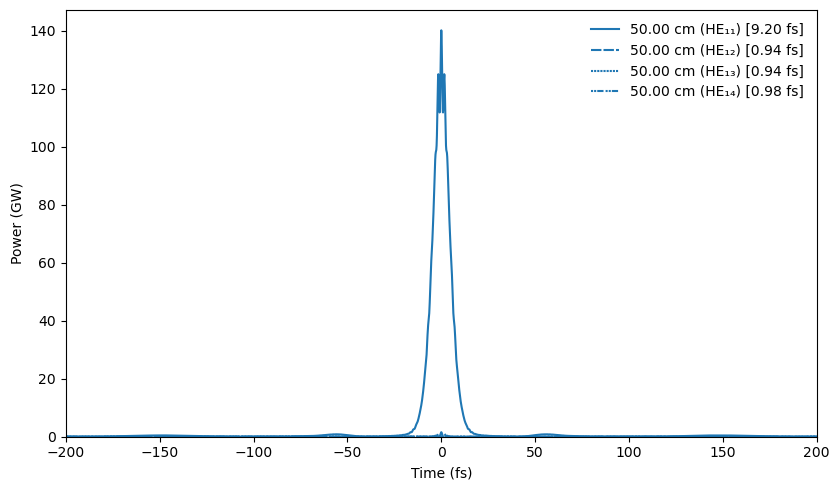

In [18]:
Plotting.time_1D(output_2ndstage_0; FTL=true, trange =(-200e-15, 200e-15));
Plotting.time_1D(output_2ndstage_1; FTL=true, trange =(-200e-15, 200e-15));
Plotting.time_1D(output_2ndstage_2; FTL=true, trange =(-200e-15, 200e-15));
Plotting.time_1D(output_2ndstage_3; FTL=true, trange =(-200e-15, 200e-15));
Plotting.time_1D(output_2ndstage_4; FTL=true, trange =(-200e-15, 200e-15));
#Plotting.spec_1D(output_2ndstage_3; λrange=(0.8e-6, 1.25e-6), log10=false);

In [19]:
Iw_0 = Processing.getIω(output_2ndstage_0,:λ,0.5,specrange=(800e-9,1250e-9),resolution=nothing)
Iw_1 = Processing.getIω(output_2ndstage_1,:λ,0.5,specrange=(800e-9,1250e-9),resolution=nothing)
Iw_2 = Processing.getIω(output_2ndstage_2,:λ,0.5,specrange=(800e-9,1250e-9),resolution=nothing)
Iw_3 = Processing.getIω(output_2ndstage_3,:λ,0.5,specrange=(800e-9,1250e-9),resolution=nothing)
Iw_4 = Processing.getIω(output_2ndstage_4,:λ,0.5,specrange=(800e-9,1250e-9),resolution=nothing)

It_0 = Processing.getEt(output_2ndstage_0,0.5,trange=(-250e-15,250e-15),FTL=true)
It_1 = Processing.getEt(output_2ndstage_1,0.5,trange=(-250e-15,250e-15),FTL=true)
It_2 = Processing.getEt(output_2ndstage_2,0.5,trange=(-250e-15,250e-15),FTL=true)
It_3 = Processing.getEt(output_2ndstage_3,0.5,trange=(-250e-15,250e-15),FTL=true)
It_4 = Processing.getEt(output_2ndstage_4,0.5,trange=(-250e-15,250e-15),FTL=true)

([-2.4983950730341586e-13, -2.4975611627961634e-13, -2.496727252558168e-13, -2.495893342320173e-13, -2.4950594320821775e-13, -2.494225521844182e-13, -2.493391611606187e-13, -2.4925577013681916e-13, -2.4917237911301963e-13, -2.490889880892201e-13  …  2.493391611605671e-13, 2.4942255218436657e-13, 2.4950594320816615e-13, 2.4958933423196573e-13, 2.496727252557652e-13, 2.497561162795647e-13, 2.4983950730336427e-13, 2.4992289832716385e-13, 2.5000628935096333e-13, 2.500896803747628e-13], [4310.039843439022 + 16669.697179510043im 20.223059268085517 - 3.725730717709018im 0.10229859362854021 + 0.292106689862892im -0.014630389028602217 + 0.7328945902583771im; 2156.0535737066125 + 20731.12593495122im 20.879398725141556 - 2.1112783192256197im -0.022255473076834963 + 0.3762113793459214im -0.09119337139577555 + 0.8996976849056402im; … ; 6229.2006675433995 + 8.093358593445527e-7im 19.259631712253068 + 2.75053040250599e-9im 0.21422802492059154 + 1.1105785803997352e-10im 0.052725174488826555 - 7.393967

In [107]:
#Iw_0[2][:,1]
real(It_0[2][:,1].*conj(It_0[2][:,1]))

5996-element Vector{Float64}:
 1.11370707885242e7
 1.6453665730961112e7
 1.7492435437362656e7
 1.5112259101405215e7
 1.2081981404714277e7
 1.0397975650648985e7
 1.0434907392145606e7
 1.1608877374974495e7
 1.306731550924636e7
 1.4043407657877708e7
 1.4241842676304055e7
 1.404765504037114e7
 1.4109918964217786e7
 ⋮
 1.3067315508809682e7
 1.160887737454667e7
 1.0434907391734056e7
 1.0397975650246168e7
 1.2081981404296245e7
 1.5112259100948827e7
 1.749243543686846e7
 1.6453665730472306e7
 1.1137070788120652e7
 4.495453611906289e6
 1.4659953154260959e6
 4.495453612136984e6

In [20]:
using CSV, DataFrames

CSV.write("HCF_w0_wavelength_05ne.csv", DataFrame([Iw_0[2][:,1]],:auto), header = false) 
CSV.write("HCF_w0_amp_05ne.csv", DataFrame(reshape(Iw_0[1],length(Iw_0[1]),1),:auto), header = false) 
CSV.write("HCF_t0_time_05ne.csv", DataFrame([real(It_0[2][:,1].*conj(It_0[2][:,1]))],:auto), header = false) 
CSV.write("HCF_t0_amp_05ne.csv", DataFrame(reshape(It_0[1],length(It_0[1]),1),:auto), header = false) 

CSV.write("HCF_w1_wavelength_05ne.csv", DataFrame([Iw_1[2][:,1]],:auto), header = false) 
CSV.write("HCF_w1_amp_05ne.csv", DataFrame(reshape(Iw_1[1],length(Iw_1[1]),1),:auto), header = false) 
CSV.write("HCF_t1_time_05ne.csv", DataFrame([real(It_1[2][:,1].*conj(It_1[2][:,1]))],:auto), header = false) 
CSV.write("HCF_t1_amp_05ne.csv", DataFrame(reshape(It_1[1],length(It_1[1]),1),:auto), header = false) 

CSV.write("HCF_w2_wavelength_05ne.csv", DataFrame([Iw_2[2][:,1]],:auto), header = false) 
CSV.write("HCF_w2_amp_05ne.csv", DataFrame(reshape(Iw_2[1],length(Iw_2[1]),1),:auto), header = false) 
CSV.write("HCF_t2_time_05ne.csv", DataFrame([real(It_2[2][:,1].*conj(It_2[2][:,1]))],:auto), header = false) 
CSV.write("HCF_t2_amp_05ne.csv", DataFrame(reshape(It_2[1],length(It_2[1]),1),:auto), header = false) 

CSV.write("HCF_w3_wavelength_05ne.csv", DataFrame([Iw_3[2][:,1]],:auto), header = false) 
CSV.write("HCF_w3_amp_05ne.csv", DataFrame(reshape(Iw_3[1],length(Iw_3[1]),1),:auto), header = false) 
CSV.write("HCF_t3_time_05ne.csv", DataFrame([real(It_3[2][:,1].*conj(It_3[2][:,1]))],:auto), header = false) 
CSV.write("HCF_t3_amp_05ne.csv", DataFrame(reshape(It_3[1],length(It_3[1]),1),:auto), header = false) 

CSV.write("HCF_w4_wavelength_05ne.csv", DataFrame([Iw_4[2][:,1]],:auto), header = false) 
CSV.write("HCF_w4_amp_05ne.csv", DataFrame(reshape(Iw_4[1],length(Iw_4[1]),1),:auto), header = false) 
CSV.write("HCF_t4_time_05ne.csv", DataFrame([real(It_4[2][:,1].*conj(It_4[2][:,1]))],:auto), header = false) 
CSV.write("HCF_t4_amp_05ne.csv", DataFrame(reshape(It_4[1],length(It_4[1]),1),:auto), header = false) 

"HCF_t4_amp_05ne.csv"